## DNN

### Data preprocessing

In [ ]:
import pandas as pd

In [ ]:
merged_df=pd.read_csv("/content/Dataset.csv")

In [ ]:
merged_df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,target
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

columns = ['Flow ID','Src IP','Dst IP','Timestamp']

# Apply Label Encoding
for column in columns:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

merged_df.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,target
0,33857,49931,443,344,53648,6,909,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,33858,55004,53650,280,443,6,909,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,65303,55004,35108,346,53,6,909,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,65303,55006,53,344,35108,6,909,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,15848,55004,60900,209,443,6,909,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
features = merged_df.drop('target', axis=1)
labels = merged_df['target']

### Importing necessary liberaries

In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Loading and splitting the dataset

In [ ]:
x,y = features,labels # This is a placeholder

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Build the DNN model
model = Sequential()

# Input layer (83 input features)
model.add(Dense(16, input_dim=83, activation='relu'))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # Dropout to prevent overfitting
model.add(Dense(128, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Training the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train,epochs=30,batch_size=32,validation_data=(X_test, y_test))

Epoch 1/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8957 - loss: 6971.5156 - val_accuracy: 0.9888 - val_loss: 784.4533
Epoch 2/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9816 - loss: 953.3453 - val_accuracy: 0.9942 - val_loss: 381.4784
Epoch 3/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9907 - loss: 506.7790 - val_accuracy: 0.9953 - val_loss: 327.2937
Epoch 4/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9926 - loss: 317.5685 - val_accuracy: 0.9961 - val_loss: 105.7695
Epoch 5/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9949 - loss: 156.2956 - val_accuracy: 0.9969 - val_loss: 119.8914
Epoch 6/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9956 - loss: 116.3793 - val_accuracy: 0.9976 - val_loss: 72.6665
Epoch 7/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9960 - loss: 100.8355 - val_accuracy: 0.9976 - val_loss: 81.9352
Epoch 8/30
8598/8598 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step -

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict the test set results and generate the classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate a classification report
print(classification_report(y_test, y_pred))

2150/2150 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9889 - loss: 0.0298
Test accuracy: 0.9892407655715942
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13677
           1       1.00      0.99      0.99     55101

    accuracy                           0.99     68778
   macro avg       0.97      0.99      0.98     68778
weighted avg       0.99      0.99      0.99     68778



Testing accuracy

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Predict the test set results and generate the classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Generate a classification report
print(classification_report(y_test, y_pred))

2150/2150 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9889 - loss: 0.0298
Test accuracy: 0.9892407655715942
2150/2150 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13677
           1       1.00      0.99      0.99     55101

    accuracy                           0.99     68778
   macro avg       0.97      0.99      0.98     68778
weighted avg       0.99      0.99      0.99     68778



## Graphs and plotting

In [ ]:
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
from sklearn.metrics import classification_report

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()  # Convert to DataFrame for easy plotting

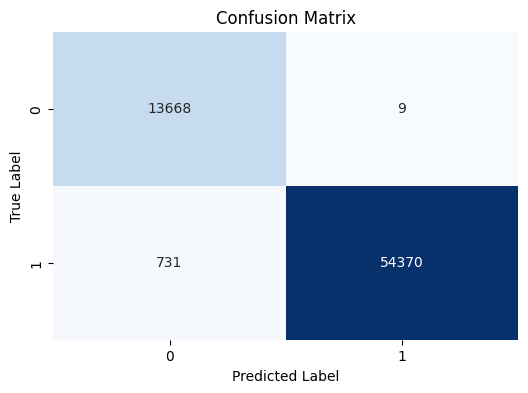

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

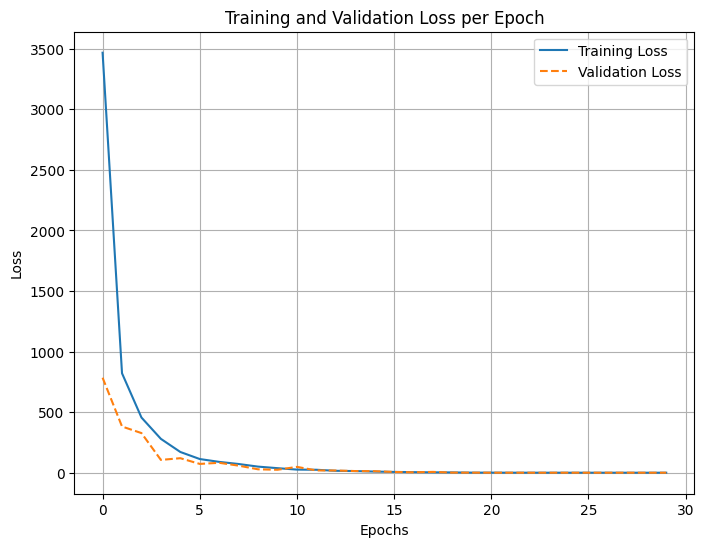

In [ ]:
# Extract loss and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
plt.figure(figsize=(8,6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', linestyle='--')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## unwanted

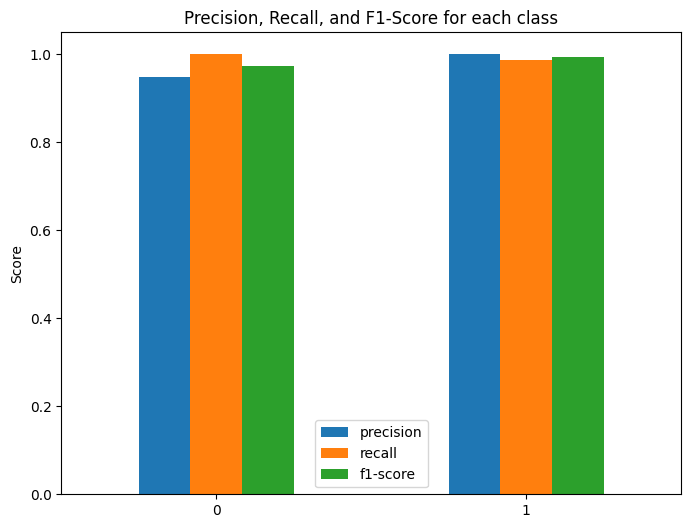

In [ ]:
# Plot Precision, Recall, F1-score for each class
metrics = ['precision', 'recall', 'f1-score']

# Plot a bar graph for precision, recall, and f1-score
report_df = report_df.loc[['0', '1'], metrics]  # Filter out support and accuracy
report_df.plot(kind="bar", figsize=(8,6))
plt.title("Precision, Recall, and F1-Score for each class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

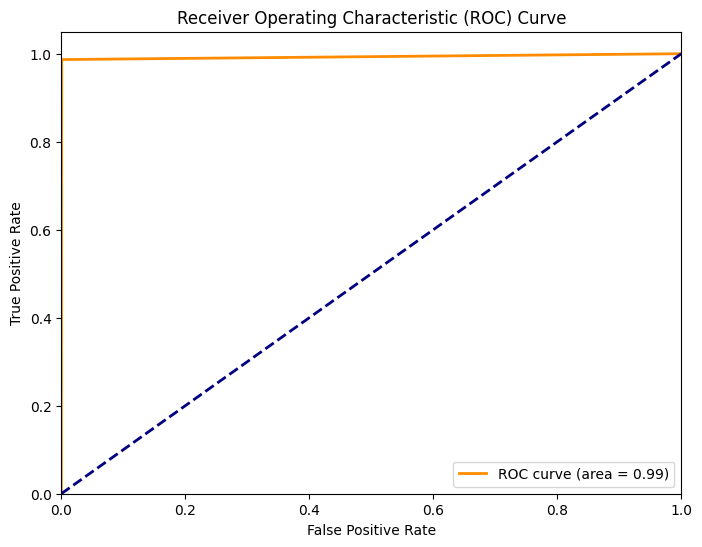

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Regenerate the classification report with 'output_dict=True'
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(report_df)


              precision    recall  f1-score       support
0              0.949233  0.999342  0.973643  13677.000000
1              0.999834  0.986733  0.993241  55101.000000
accuracy       0.989241  0.989241  0.989241      0.989241
macro avg      0.974534  0.993038  0.983442  68778.000000
weighted avg   0.989772  0.989241  0.989344  68778.000000


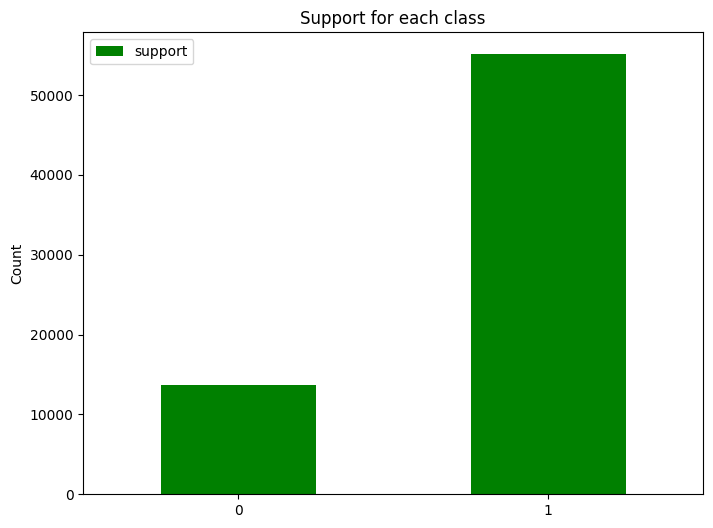

In [ ]:
# Plot the accuracy and support for each class
report_df_acc_sup = report_df.loc[['0', '1'], ['support']]
report_df_acc_sup.plot(kind="bar", figsize=(8,6), color='green')
plt.title("Support for each class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

##Model testing


In [ ]:
#Leave one out
import numpy as np
from sklearn.model_selection import train_test_split

def evaluate_trained_model(X, y, model, test_size=0.2, random_state=42):
    """
    Evaluates a pre-trained neural network model using holdout validation.

    Parameters:
    X (numpy.ndarray): Input features
    y (numpy.ndarray): Target variable
    model (tensorflow.keras.models.Sequential): Trained neural network model
    test_size (float, optional): Proportion of data to use for the test set (default is 0.2)
    random_state (int, optional): Random state for reproducibility (default is 42)

    Returns:
    tuple: (train_score, test_score)
        train_score (float): Model performance on the training set
        test_score (float): Model performance on the test set
    """
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Evaluate the model on the training and test sets
    train_score = model.evaluate(X_train, y_train, verbose=0)[1]
    test_score = model.evaluate(X_test, y_test, verbose=0)[1]

    return train_score, test_score

In [ ]:
evaluate_trained_model(x,y,model)

(0.9887063503265381, 0.987626850605011)

##  Pushing the model to hugging face

In [ ]:
# Save the model using TensorFlow's SavedModel format
model.save('saved_model.keras')

In [ ]:
from huggingface_hub import Repository

# Clone the Hugging Face repository
repo = Repository(local_dir="ddos_detection_repo", clone_from="Sharukesh/ddos-detection-model")

# Move the .keras file to the repository directory
import shutil
shutil.move('/content/saved_model.keras', 'ddos_detection_repo/ddos_detection_model.keras')

# Push the model to Hugging Face
repo.push_to_hub(commit_message="Initial commit of DDoS detection model in .keras format")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
/content/ddos_detection_repo is already a clone of https://huggingface.co/Sharukesh/ddos-detection-model. Make sure you pull the latest changes with `repo.git_pull()`.
Adding files tracked by Git LFS: ['ddos_detection_model.keras']. This may take a bit of time if the files are large.
To https://huggingface.co/Sharukesh/ddos-detection-model
   ddb8bbf..81ff863  main -> main

   ddb8bbf..81ff863  main -> main



'https://huggingface.co/Sharukesh/ddos-detection-model/commit/81ff863ac502a27e11cb39243e0cb7f0b3820552'

In [ ]:
print(merged_df.columns)

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [ ]:
from keras.models import load_model

# Load the model from a .keras file
model = load_model('/content/dnn_model.keras')

# Check model summary to ensure it's loaded correctly
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,213 (805.52 KB)

 Trainable params: 68,737 (268.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 137,476 (537.02 KB)